# 1. Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

te = pd.read_csv('data/tennis.csv')

te = te.dropna()

y = te['player1 total points won']
x = te['player2 total points won']

# print(y)
est = sm.OLS(y, x).fit()

sm.graphics.plot_fit(est, 'player2 total points won', vlines=False)
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          3.173e+04
Date:                      Thu, 14 Jan 2021   Prob (F-statistic):                        0.00
Time:                              22:42:55   Log-Likelihood:                         -4262.4
No. Observations:                      1016   AIC:                                      8527.
Df Residuals:                          1015   BIC:                                      8532.
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
player2 total points won     1.1257      0.006    178.124      0.000       1.113       1.138
==============================================================================
Omnibus:                       71.489   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.456
Skew:                          -0.707   Prob(JB):                     2.78e-19
Kurtosis:                       3.148   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Coeff & p-value
In t-test analysis of a regression, the coefficient, especially between two values such as Federer's points vs his oponents' points, is the exact slope of the linear regression made between these two factors. It means, for each increase of 1 unit (or one point in our case), the resulting/forecasted value should increase by $1 * coeff$. The p-value, is our indication on whether or not the relationship between the predictor and the feature (Federer's points) should be considered or not. A low p-value ($p <= 0.05$).

We can extrapolate that with a coeff of 1.1257, Federer will score 1.257 points for each point scored by his opponent, additionally, our p-value is 0.000, which indicates that we can reject the null hypothesis that Federer does not score 1.1257 points for each of his oponent's points; we can assume he does as a p value of 0.00 is "perfectly" signifcant.

#### Constant term
Technically, considering we're observing a tennis player's performance against many other players, if we did not add a constant term, it would mean that we would "always" be predicting that if Federer shuts-out an oponent (oponent scores no points), that Federer would not be scoring any points either. This is because, when plotting for one predictor, forgoing a constant term forces the regression to pass through the origin of the plot $(0,0)$. 
This would resulting in an immediate draw should oponents not score any points. While this is possible, for a game to have a 0-0 final score, it is more likely that Federer can shut-out an oponent.

Therefore, in order to generate a more realistic regression, an in essence, a better fit, we should apply a constant term. This might change our coefficient, by reducing it; however, it should not increase our p-value significantly, as the relationship between Federer and his oponents should not be less significant by adding a constant term in this case.


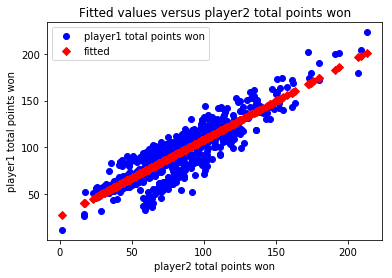

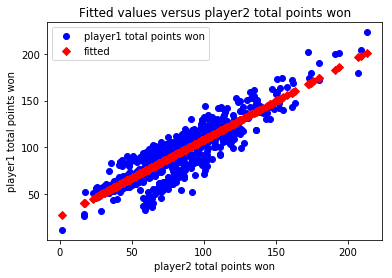

In [3]:
te = pd.read_csv('data/tennis.csv')

te = te.dropna()

y = te['player1 total points won']
x = te['player2 total points won']

est = sm.OLS(y, sm.add_constant(x)).fit()
# est.summary()
sm.graphics.plot_fit(est, 'player2 total points won', vlines=False)

Right away, we can see that the fitted line is more evenly projected through the scatter of points than without a constant term. We can also notice that the p-value is unchanged, as predicted.

# 2. College admissions

Using the `college.csv` dataset, answer the following:

1. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

2. Do private schools see more admissions overall? T-test this using a linear regression. Hint: use a binary explanatory variable for `Private`. Explain your model specification choices.


### 1 Top25perc v Top10perc

In [4]:
co = pd.read_csv('data/college.csv')
# co

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Top10perc   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              7971.
Date:                Thu, 14 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:42:57   Log-Likelihood:                         -2871.5
No. Observations:                 777   AIC:                                      5745.
Df Residuals:                     776   BIC:                                      5750.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Top25perc      0.5275      0.006     89.281      0.000       0.516       0.539
==============================================================================
Omnibus:                      308.637   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1351.429
Skew:                           1.814   Prob(JB):                    3.47e-294
Kurtosis:                       8.346   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

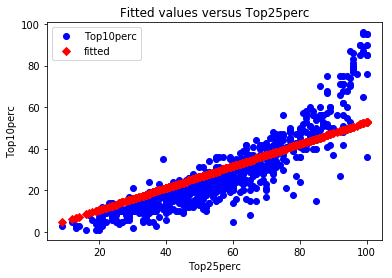

In [5]:
y = co['Top10perc']
x = co['Top25perc']#[:, np.newaxis]

est = sm.OLS(y, x).fit()

sm.graphics.plot_fit(est, 'Top25perc', vlines=False)

est.summary()

/home/jlmy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top10perc   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     2305.
Date:                Thu, 14 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:42:58   Log-Likelihood:                -2578.5
No. Observations:                 777   AIC:                             5163.
Df Residuals:                     774   BIC:                             5177.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7490      1.735      6.773      0.000       8.344      15.154
x1            -0.3124      0.062     -5.002      0.000      -0.435      -0.190
x2             0.0095      0.001     18.066      0.000       0.008       0.011
==============================================================================
Omnibus:                      184.094   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              954.340
Skew:                          -0.970   Prob(JB):                    5.86e-208
Kurtosis:                       8.071   Cond. No.                     3.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

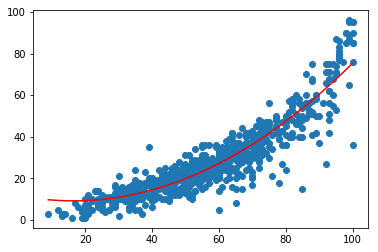

In [6]:
import operator
y = co['Top10perc']
x = co['Top25perc'][:, np.newaxis]

# sm.add_constant(x)
### Square
poly_reg_s = PolynomialFeatures(degree=2)

xp = poly_reg_s.fit_transform(x)

model = sm.OLS(y, xp).fit()
ypred = model.predict(xp)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,ypred), key=sort_axis)
xs, y_poly_pred = zip(*sorted_zip)

plt.scatter(x,y)

plt.plot(xs, y_poly_pred, color='r', label='reg')
model.summary()

It would seem, by comparing $R^2$ values, that the quadratic fit is more accurate, ($R^2$ quadratic = 0.856, whereas $R^2$ linear = 0.796). While they are not significantly different: 
$$R^2 quadratic - R^2 linear = 0.06$$

If we rely on the AIC indicator, since the AIC for the quadratic line is smaller (5163 vs 5745 for linear), we can assume that using the quadratic model will offer better fitting than the linear model.'

#### Constant Term

In this case, a constant term confers no benefits, as if we are Top25perc as the predictor, logically, should there be 0 Top25perc, then there forcibly would not be a positive value of Top10perc.

### Private Schools

Do private schools see more admissions overall? T-test this using a linear regression. Hint: use a binary explanatory variable for Private. Explain your model specification choices.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Apps   R-squared (uncentered):                   0.119
Model:                            OLS   Adj. R-squared (uncentered):              0.118
Method:                 Least Squares   F-statistic:                              104.5
Date:                Thu, 14 Jan 2021   Prob (F-statistic):                    4.23e-23
Time:                        22:42:59   Log-Likelihood:                         -7654.9
No. Observations:                 777   AIC:                                  1.531e+04
Df Residuals:                     776   BIC:                                  1.532e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
IsPrivate   1977.9292    193.484     10.223      0.000    1598.114    2357.744
==============================================================================
Omnibus:                      582.995   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13585.358
Skew:                           3.146   Prob(JB):                         0.00
Kurtosis:                      22.494   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

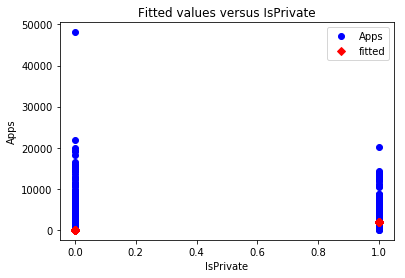

In [7]:
from scipy import stats
co['IsPrivate'] = co.Private.map({'Yes': 1,'No':0})
y = co['Apps']
x = co['IsPrivate']#[:, np.newaxis]

est = sm.OLS(y, x).fit()

sm.graphics.plot_fit(est, 'IsPrivate', vlines=False)

est.summary()
# print(est.t_test)
# co

The t-test indicates that we should reject the null hypothesis, and assume that there is a relationship between number of applications and whether or not a school is a private institution, we cannot visualize or determine the factor of the later over non-private schools.

We also cannot extrapolate a meaningful conclusion from the $R^2$ value, since we are using a binary predictor, and since we are not trying to predict anything.

For this, we decided to look into the Enrollment rate, meaning, the % of offers sent, which were subsequently accepted by candidates as this seems to be a better indicator. This normalizes the distribution of applications, to within a % range (0 - 100) instead of an effective range (0 - 50,000), and should give us a better idea of the spread of popularity amongst those who ACTUALLY get to chose which schools they get to go to.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  erate   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     42.80
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           1.10e-10
Time:                        22:43:00   Log-Likelihood:                 480.64
No. Observations:                 777   AIC:                            -957.3
Df Residuals:                     775   BIC:                            -948.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5380      0.009     60.015      0.000       0.520       0.556
IsPrivate      0.0688      0.011      6.542      0.000       0.048       0.089
==============================================================================
Omnibus:                      130.958   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.260
Skew:                          -1.018   Prob(JB):                     1.35e-51
Kurtosis:                       4.757   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

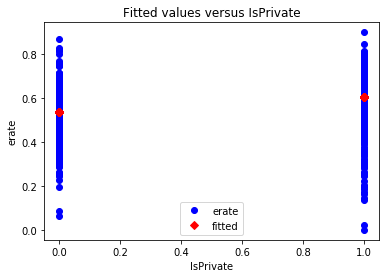

In [8]:
co['erate'] = (co.Accept - co.Enroll) / co.Accept
y = co['erate']
x = co['IsPrivate']#[:, np.newaxis]

est = sm.OLS(y, sm.add_constant(x)).fit()

sm.graphics.plot_fit(est, 'IsPrivate', vlines=False)

est.summary()

We can see here, that in fact, private institutions seem to have a larger distribution of acceptance rates than non-private ones.
we are still in the same p-value result of rejecting the null hypothesis as well, meaning we should not discard this fit.

However, we can see that the coefficient is 0.06, which indicates that for every candidate who accepts an offer at a non-private instituion, 0.06 students will accept an offer at a private institution. This suggests that while the number of applications is greatly higher at private institutions, admissions are insignificantly different when compared to non-private institutions.

# 3. Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 
 ii. How strong is the relationship between the predictor and the response?
 
 iii. Is the relationship between the predictor and the response positive or negative?

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

 v. Make a regression plot the response and the predictor.

In [9]:
"""
From my workshop 2.4
"""

import csv
file_columns = []
file_rows = []

file_o = {}
with open('data/auto.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    counter = 0
    for row in spamreader:
        if counter == 0:
            for column in row:
                for item in column.split('\t'):
                    file_columns.append(item)
                    file_o[item] = []
            
            counter += 1
        else:
            if len(row) == 1:
                continue
            actual_row = []
            for char in row:
                if char != "":
                    temp_char = char
                    splits = temp_char.split('\t')
                    if len(splits) > 1:
                        for y in range(len(splits)):
                            splits[y] = splits[y].strip("'")
                            splits[y] = splits[y].strip('"')
                        actual_row = actual_row + splits#[split.strip('"')for split in splits]
                        continue
                    temp_char = temp_char.strip("'")
                    temp_char = temp_char.strip('"')
                    actual_row.append(temp_char)
            car_name = " ".join(actual_row[8:])
            del actual_row[8:]
            def handle_item(value):
                if value == '': return 0.
                elif value == '.':return 0.
                elif value == '?':return 0.
                return float(value)
            next_row = [handle_item(item) for item in actual_row[:8]]
            if len(next_row) == 7:
                next_row.append('1')
            next_row.append(car_name)
            file_rows.append(next_row)
            counter += 1


auto = pd.DataFrame(data=file_rows, columns=file_columns)
auto = auto[auto['horsepower'] > 0]
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
393,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
394,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
395,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [10]:
"""
attempt at cleaning up the code above..
"""

# auto = pd.read_csv('data/auto.csv')
# columns = np.concatenate([repr(item).replace('\\','$').split('$') for item in str(auto.columns[0]).split(" ")])
# columns = list(map(lambda x: x.replace("'", ''), columns))
# columns
# values = auto[auto.columns[0]][1:].iloc[0]
# values = values.split(" ")

# def cleanup_value(x):
#     if x is None: return "xxxxx"
#     v = x.replace("'", '')
#     v = x.replace('"', '')
#     v = x.replace('\\','$')
#     v = v.replace("1$t", '')
#     v = x.replace('$','')
#     return v

# values = list(map(lambda x: cleanup_value(x) if x != '' else None, values))
# print(values)
# values.remove(None)
# print(values)

'\nattempt at cleaning up the code above..\n'

In [11]:
y = auto['mpg']
x = auto['horsepower']

est = sm.OLS(y, sm.add_constant(x)).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           7.03e-81
Time:                        22:43:03   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Is there a relationship between the predictor and the response?
Here we can see a p-value of 0, therefore we can assume there is a relationship between horsepower and mpg.


### How strong is the relationship between the predictor and the response?

In [12]:
from scipy.stats import pearsonr
corr, _ = pearsonr(auto['horsepower'], y)
label = ""
corrA = abs(corr)
if corrA >= 0.8:
    label = "The relationship is very strong"
elif corrA >= 0.6:
    label= "The relationship is strong"
elif corrA >= 0.4:
    label= "The relationship is moderately strong"
elif corrA >= 0.2:
    label= "The relationship is weak"
else:
    label= "The relationship is very weak"

print(label, ", pearson coefficient: {cor}".format(cor=corr))


The relationship is strong , pearson coefficient: -0.7784267838977761


### Is the relationship between the predictor and the response positive or negative?
in this case, the coeff is -0.1489, which means the relationship is negative.

### What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals 


In [13]:
params = list(est.params)
mpg94 = (98. * params[1]) + params[0]

print('The mpg for 98hp is predicted to be : ', mpg94)


The mpg for 98hp is predicted to be :  24.46707715251243


### Make a regression plot the response and the predictor.

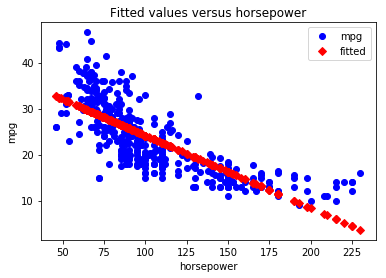

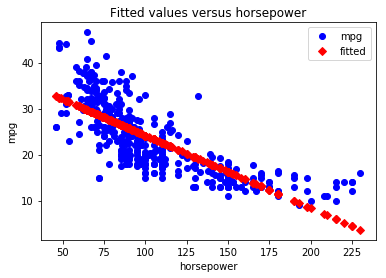

In [14]:
sm.graphics.plot_fit(est, 'horsepower', vlines=False)

# 4. Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

v. Is there heteroscedasticity in the fit?

In [15]:
"""
Code taken from my 3.1 workshop
"""
import math

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def reg_plot_on_ax(feature, y, supb):
    Xs = auto[feature]
#     Xs = sm.add_constant(Xs)
#     print(y)
    model_s = sm.OLS(y, sm.add_constant(Xs)).fit()
    preds_s = model_s.predict(Xs)
    
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(Xs,preds_s), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    model_s.summary()
    supb.plot(x, y_poly_pred, color='m', label=feature)
    supb.scatter(Xs, y, s=10)
    supb.set(xlabel=feature, ylabel='MPG')
    return

y = auto['mpg']

features = list(auto.columns)
features.remove('mpg')
features.remove('name')
features.remove('horsepower')
# chks = list(chunks(features, 2))

# print(chks)
# fig, axs = plt.subplots(len(chks),len(chks[0]))
# fig.set_figheight(20)
# fig.set_figwidth(12)
# fig.suptitle('MPG relative to other Features')
# for i in range(len(axs)):
#     for j in range(len(axs[i])):
#         if len(chks[i]) > j:
#             reg_plot_on_ax(chks[i][j], y, axs[i][j])
fits = dict()
scores = dict()


fauto = auto[features]
x = sm.add_constant(fauto)
model = sm.OLS(y,x).fit(cov_type='HC2')

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     293.5
Date:                Thu, 14 Jan 2021   Prob (F-statistic):          2.91e-140
Time:                        22:43:08   Log-Likelihood:                -1024.2
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     385   BIC:                             2090.
Df Model:                           6                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.7438      4.318     -4.573      0.000     -28.206     -11.281
cylinders       -0.4447      0.309     -1.438      0.151      -1.051       0.162
displacement     0.0172      0.008      2.047      0.041       0.001       0.034
weight          -0.0068      0.001     -9.717      0.000      -0.008      -0.005
acceleration     0.1557      0.106      1.462      0.144      -0.053       0.364
year             0.7647      0.049     15.600      0.000       0.669       0.861
origin           1.3460      0.277      4.867      0.000       0.804       1.888
==============================================================================
Omnibus:                       30.593   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.017
Skew:                           0.509   Prob(JB):                     8.35e-12
Kurtosis:                       4.444   Cond. No.                     7.70e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 7.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

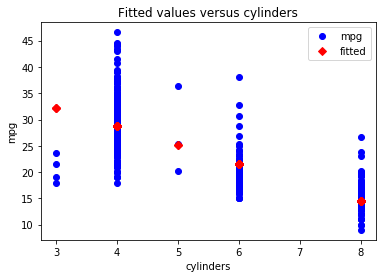

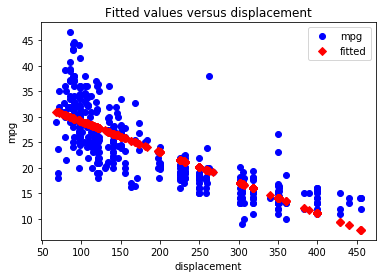

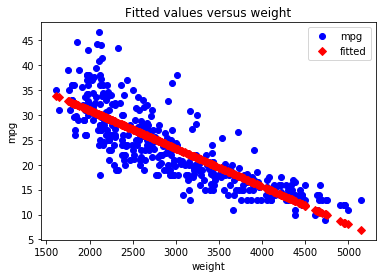

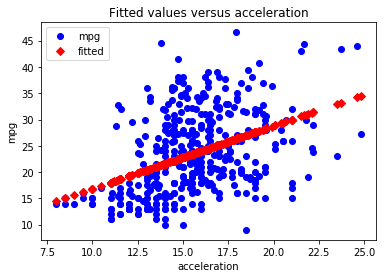

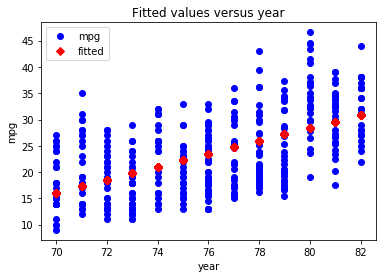

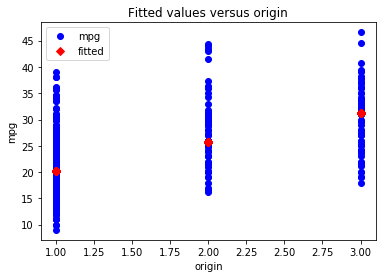

In [16]:
for feature in features:
    x = auto[feature]
    fits[feature] = sm.OLS(y, sm.add_constant(x)).fit(cov_type='HC2')
    sm.graphics.plot_fit(fits[feature], feature, vlines=False)

#### i. Is there a relationship between the predictors and the response?
mileage has significant relationships with more features, save with the acceleration and cylinders predictors which have p-values above our null hypothesis threshold of 0.05 (0.144 and 0.151 respectively).  We can assume that they are not statistically significant to mileage.

#### ii. Which predictors appear to have a statistically significant relationship to the response?
Contrarily, the displacement, weight, year and origins all have acceptable or zero-value p-values, meaning they are statistically significant to the response.

### iii The coefficient for the year
The later is at 0.7647 when fitted singularly against the mileage. This indicates that the relationship is positive, that the younger the make of the car, the more likely will we have better mileage.

#### iv Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?


The only displacements worth noting are:

    i. 3 cylinders seem to be out of the range of distribution, whoever, we may not want to discard these as 3-cylinder engines are still current today; we also have 5 cylinder measurements, so this might just be an unpair cylinder engine manifestation in relation to pair-number cylinder engines
    ii. high acceleration readings, ~ 25, seem to be a bit isolated
    iii. mid-level acceleration seem to also have some stand-out unusually high readings in the ~12 and ~18 range of values.

#### v. Is there heteroscedasticity in the fit?
All plots clearly shows signs of inconsistent scatterring of mileage accross the various features.
Mainly in the case of acceleration, displacement and cylinders.
We can correlate this to these three features being the only ones with non-zero p-values in our regression summary above.

To be sure, we'll conduct a mathematical test bellow, useing the Breusch-Pagan of the Statsmodule framework:

In [17]:
from statsmodels.stats.diagnostic import het_breuschpagan

"""
Ref: https://medium.com/@remycanario17/tests-for-heteroskedasticity-in-python-208a0fdb04ab
"""

bp_test = het_breuschpagan(model.resid, auto[features])
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

results = dict(zip(labels, bp_test))

if results['F-Test p-value'] < 0.05:
    print("The fits indicate Heteroskedasticity")
else:
    print("The fits do not indicate Heteroskedasticity")

The fits indicate Heteroskedasticity


# 5. Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     43.09
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           4.04e-24
Time:                        22:59:48   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.641     20.333      0.000      11.786      14.301
Price         -0.0545      0.005    -10.515      0.000      -0.065      -0.044
Urban         -0.0219      0.258     -0.085      0.932      -0.527       0.484
US             1.2006      0.246      4.878      0.000       0.718       1.683
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

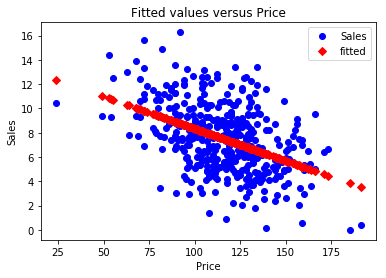

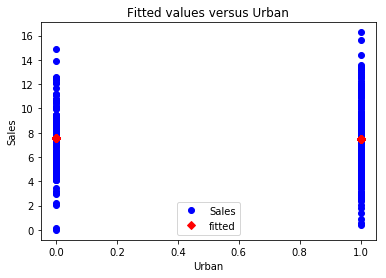

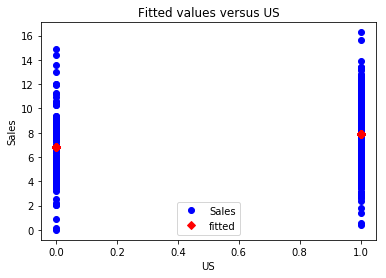

In [47]:
cs = pd.read_csv('data/carseats.csv')
cs['US'] = cs.US.map({"Yes": 1, 'No': 0})
cs['Urban'] = cs.Urban.map({"Yes": 1, 'No': 0})
cs['Price'] = cs['Price'].astype(float)
features = cs[['Price', 'Urban', 'US']]
y = cs['Sales']

x = sm.add_constant(features)
model = sm.OLS(y,x).fit(cov_type='HC2')

for feature in ['Price', 'Urban', 'US']:
    m = sm.OLS(y, sm.add_constant(cs[feature])).fit(cov_type='HC2')
    sm.graphics.plot_fit(m, feature, vlines=False)

model.summary()

##### 2. Coeffs
###### Price
The price's coefficient is -0.0545, meaning that for each increment of price, sales will drop quite significantly, as one can assume people do not want to buy expensive carseats more often than cheaper ones.

###### Urban
The urban feature's coefficient is -0.0219, which is negative, like the Price. However, whether or not the buyer is in an urban setting or a rural one, is probably of little relevance as cars get sold in both types of settings. Should we assume this coefficient is relevant, this would indicate that should a seat be put up for sale in an urban setting, it would be ~98% less likely to be sold than in an rural setting.

###### US
The US feature's coefficient is 1.2006, the highest one, indicating that for the fact a seat is american-made, we can assume that this will be a positive sale factor by 20%.

##### 3. Null Hypothesis
The only non-zero p-value is the Urban feature, with a value of 0.932, which greatly surpasses or acceptance threshold of the null hypothesis ($\alpha = 0.01$). This also falls in line with our coefficient analysis earlier, therefore we can consider the urban feature statistically insignificant.

#### 4.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     64.66
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           4.90e-25
Time:                        23:26:54   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.622     20.944      0.000      11.811      14.250
Price         -0.0545      0.005    -10.543      0.000      -0.065      -0.044
US             1.1996      0.247      4.863      0.000       0.716       1.683
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

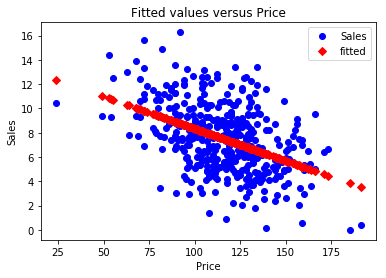

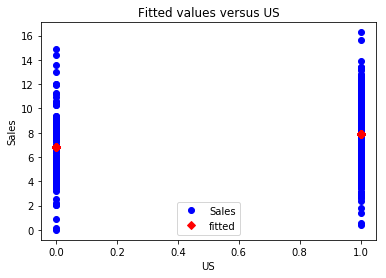

In [50]:
features = cs[['Price', 'US']]

x = sm.add_constant(features)
model = sm.OLS(y,x).fit(cov_type='HC2')

for feature in ['Price', 'US']:
    m = sm.OLS(y, sm.add_constant(cs[feature])).fit(cov_type='HC2')
    sm.graphics.plot_fit(m, feature, vlines=False)

model.summary()

#### 5. 
We can see that for both fits, the Prob(F-stat) is 4.90e-24 (1) and 4.90e-25 (4) which is much smaller than our alpha of 0.01. We can conclude that both models 1 and 4 fit the data very well, as these near-0 P(F-stat) values suggest near-zero randomness in the prediction of Sales with our features.

We can however, assume that model 4 is more precise, as it suggest less randomness by a factor of 10.

#### 6.

In [77]:
from scipy.stats import sem, t
conf = 0.95
std_errs = model.summary2().tables[1]['Std.Err.']

for value in ['US', 'Price']:
    n = cs[value].count()
    m = cs[value].mean()
    stderr = std_errs[value]
    h = stderr * t.ppf((1 + conf) / 2, n - 1)
    start = m - h
    end = m + h
    print("{conf}% confidence interval for {feature} is [{minim},{maxi}]".format(feature=value,conf=conf, minim=start,maxi=end))

0.95% confidence interval for US is [0.16002194403764408,1.129978055962356]
0.95% confidence interval for Price is [115.7848414838686,115.8051585161314]
